# Z-Scores of European Countries

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#datapath
df = pd.read_excel('z-scores-by-country.xlsx')

In [21]:
#checking the structure of the data,checking for null values and duplicates
df.head()

,country,group,week,zscore
0,Austria,Total,2020-01,-0.58
1,Austria,Total,2020-02,0.66
2,Austria,Total,2020-03,2.29
3,Austria,Total,2020-04,1.88
4,Austria,Total,2020-05,4.08


In [22]:
df.info

<bound method DataFrame.info of           country  group     week  zscore
0         Austria  Total  2020-01   -0.58
1         Austria  Total  2020-02    0.66
2         Austria  Total  2020-03    2.29
3         Austria  Total  2020-04    1.88
4         Austria  Total  2020-05    4.08
...           ...    ...      ...     ...
2699  Switzerland  Total  2023-47    2.58
2700  Switzerland  Total  2023-48    4.38
2701  Switzerland  Total  2023-49    4.31
2702  Switzerland  Total  2023-50    3.84
2703  Switzerland  Total  2023-51   -5.42

[2704 rows x 4 columns]>

In [27]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2699    False
2700    False
2701    False
2702    False
2703    False
Length: 2704, dtype: bool

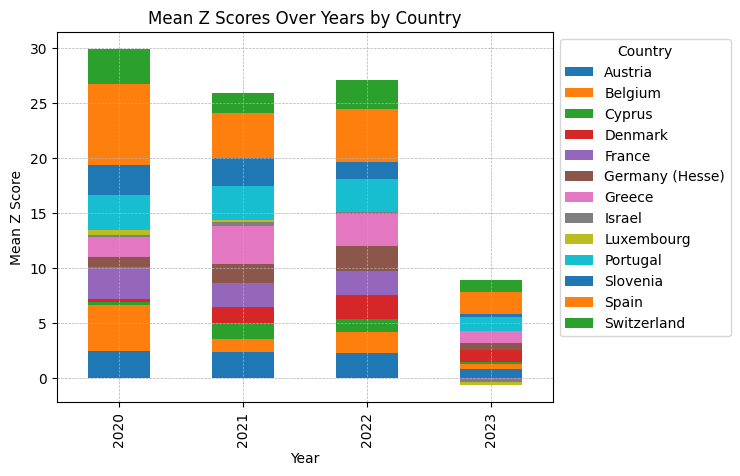

In [23]:
#changing the format of week column
df['week'] = pd.to_datetime(df['week'] + '-0', format='%Y-%W-%w')

# Extract year from the 'week' column
df['year'] = df['week'].dt.year

# Calculate mean z score for each year and country
mean_zscores = df.groupby(['year', 'country'])['zscore'].mean().unstack()

# Visualize the results in the form of stacked bar graph
ax = mean_zscores.plot(kind='bar', stacked=True)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines

plt.xlabel('Year')
plt.ylabel('Mean Z Score')
plt.title('Mean Z Scores Over Years by Country')
plt.legend(title='Country', bbox_to_anchor=(1, 1))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

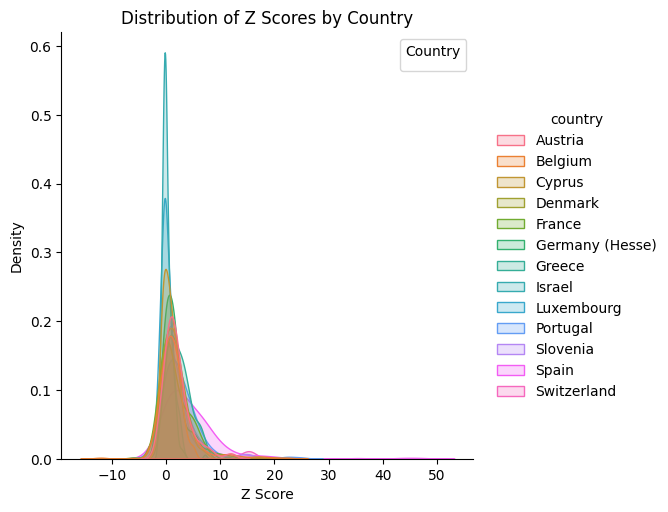

In [25]:
#Visualizing Z-Scores using Distribution
#pd.set_option('mode.use_inf_as_na', False)
plt.figure()
sns.displot(df, x='zscore', hue='country', kind='kde', fill=True, common_norm=False,legend=True)
plt.xlabel('Z Score')
plt.ylabel('Density')
plt.title('Distribution of Z Scores by Country')
plt.legend(title='Country', bbox_to_anchor=(1, 1))

plt.show()